In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta

In [159]:
df = pd.read_csv("EURUSD_M15.csv", header = None)

In [160]:
df.rename(columns={0:'date',1:'open',2:'high',3:'low',4:'close',5:'volume'}, inplace = True)

In [68]:
df["price_ch"] = np.diff(df["close"], prepend=np.nan)
df["macd_shifted"] = df.macd.shift(1)

In [70]:
df.dropna(inplace = True)

In [163]:
df["trend_strat"] = np.cumsum(-df["diff"]*50000)
df["strat"] = np.cumsum( - np.sign(df.ma) * ((df["diff"]- df["diff"].mean())*50000 - 4))

In [50]:
np.sum(-np.sign(df.macd_shifted) == np.sign(df.price_ch))/df.shape[0]*100

50.15307653826914

In [155]:
df.loc[:,["ma","diff"]].corr()

,ma,diff
ma,1.000000,-0.010953
diff,-0.010953,1.000000


In [161]:
df["ma"] = (df["close"] - df["close"].shift(1)).shift(1).rolling(50).mean()

In [162]:
df["diff"] = df["close"] - df["close"].shift(1)

In [164]:
df = df.dropna()

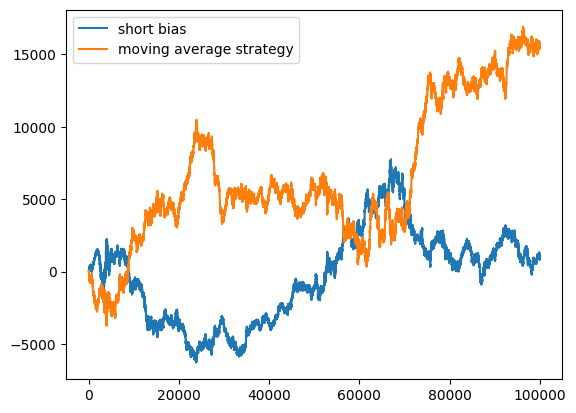

In [165]:
plt.plot(df.trend_strat, label = "short bias")
plt.plot(df.strat, label="moving average strategy")
plt.legend()

In [73]:
df.loc[:,"ma"] = df.ma.apply(lambda x: 0 if x < 0 else x)

In [166]:
df[df.strat == df.strat.min()]

,date,open,high,low,close,volume,ma,diff,trend_strat,strat
3983,2020-03-20 07:45,1.08048,1.08309,1.07962,1.08138,5457,0.000233,0.0009,1387.5,-3744.780838


In [168]:
df

,date,open,high,low,close,volume,ma,diff,trend_strat,strat
51,2020-01-23 09:45,1.10838,1.10867,1.10828,1.10843,1769,-0.000015,0.00005,35.0,-1.489435
52,2020-01-23 10:00,1.10844,1.10875,1.10820,1.10847,1840,-0.000017,0.00004,33.0,-3.478870
53,2020-01-23 10:15,1.10849,1.10878,1.10846,1.10854,1688,-0.000017,0.00007,29.5,-3.968305
54,2020-01-23 10:30,1.10854,1.10883,1.10842,1.10881,1607,-0.000013,0.00027,16.0,5.542260
55,2020-01-23 10:45,1.10880,1.10919,1.10863,1.10911,1520,-0.000011,0.00030,1.0,16.552826
...,...,...,...,...,...,...,...,...,...,...
99995,2024-01-24 19:45,1.08883,1.08904,1.08869,1.08883,2560,0.000040,-0.00002,1015.0,15680.337593
99996,2024-01-24 20:00,1.08882,1.08905,1.08868,1.08868,3391,0.000038,-0.00015,1022.5,15691.827028
99997,2024-01-24 20:15,1.08868,1.08868,1.08834,1.08845,4064,0.000016,-0.00023,1034.0,15707.316463
99998,2024-01-24 20:30,1.08843,1.08865,1.08835,1.08857,2740,0.000023,0.00012,1028.0,15705.305898


In [145]:
df["diff"]*100000 - 4

51       1.000000e+00
52       4.000356e-12
53       3.000000e+00
54       2.300000e+01
55       2.600000e+01
             ...     
99995   -6.000000e+00
99996   -1.900000e+01
99997   -2.700000e+01
99998    8.000000e+00
99999   -6.100000e+01
Name: diff, Length: 99949, dtype: float64

<Axes: >

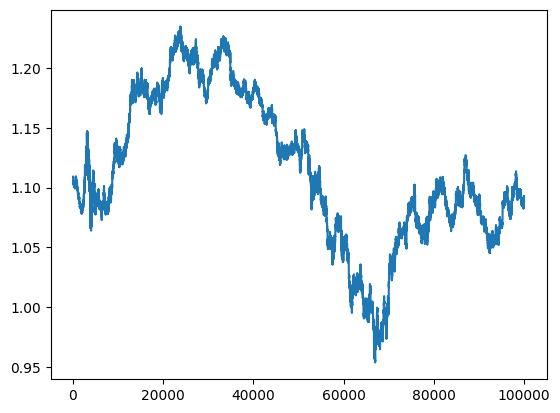

In [146]:
df.close.plot()